<a href="https://colab.research.google.com/github/Sapire2003/Project-Portfolio/blob/Data-Analysis/Document_Specifics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC-206: Text Analytics
# Noah Sapire


## Assignment 5: Higher or lower?

In this assignment you'll be practicing with the concepts covered in class.

There are NO prizes for short, concise code where readability is impacted. However you're free to use concepts and code I use in class.

ALWAYS print nicely.

CREATE new text and code cells as you feel appropriate

**BEFORE HANDING IN THIS NOTEBOOK - REMOVE MY EXAMPLE CODE AND GRAPHS. ONLY SUBMIT CODE THAT ANSWERS MY QUESTIONS.**


### Part 1: The long and the short of it

In this notebook, you're going to be using the NLTK (https://www.nltk.org/) to explore texts.

The NLTK comes with a bunch of corpora. Corpora is the plural of corpus, meaning - well, literally *body*. In the sense of text, it means a collection of documents or similar. If you want to see which resources are inluded with the NLTK, you can see them here: http://www.nltk.org/nltk_data/

We're going to use a specific corpus for this assignment. It's closely related to documents you've seen before.

It's called the *C-Span Inaugural Address Corpus*, and it contains the text of the Inaugural Address, made by each president, up to 2021.

As this is a text resource containined in the NLTK, you have to download it first. I'll do that for you below. It also comes pre-processed - so you can access the raw material (the text of the speech), the sentences, and the words.

We'll concentrate on using the words for now. We can directly access the words elements using the .words method. I've already shown you this convention when we access the words of the stopword list, using:

```
# stopwords.words('english')

```

Remember though that accessing words this way is just the same as having our own text, and calling word_tokenize() on it. The result is the same - we get a list of word tokens. Note that I'll be using WORDS and TOKENS interchangeably throughout this notebook. When you call the .words, you get tokens, but I'll refer to them as words. Or tokens. Or both.


In [ ]:
# Loading NLTK and resources

import nltk

nltk.download("inaugural")


[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

In [ ]:
# Accessing the inaugural address corpus

from nltk.corpus import inaugural


Each NLTK corpus comes complete with some pre-processing.
* To access all the words of the corpus, we use .words()
* To access all the sentences of the corpus, we use .sents()

For instance, to get all the sentences in the entire corpus, we'd write:

```
# sents = inaugural.sents()
```

Both .words() and .sents() methods take an optional argument, a file ID name. Below, I load in all the words from George Washington's 1789 inaugural address, and print out how many words there are.


In [ ]:
# Get the words for Washington's 1789 inaugural

fileID = '1789-Washington.txt'
name = 'Washington'
date = '1789'

words_1789 = inaugural.words(fileID)
num_words = len(words_1789)
print('{} spoke {} words in {}'.format(name,num_words,date))

Washington spoke 1538 words in 1789


There is also a method for inaugural called .fileids(). This method will return a list of strings, where each string represents one inaugural address in the corpus. Ok, let's get going.

(a) Print out (nicely) how many inaugural address speeches are in this corpus

(b) Iterate through the file ids, and get the words from each speech. Count the number of words. I want you to print the name, the year and the word count for the President with the longest speech (in total word count) and the shortest.

**HINT** - You can use the fileID, which is a string, to 'extract' both the date and the name, using slicing.

(c) Tell me something about the person who gave the longest speech, by googling about them. Who were they, and what was happening (in the world, or in the United States) when they gave the speech?

You do NOT need to do any data cleaning for this part.

In [ ]:
# Do (a) and (b) here, or create extra cells as necessary
inaugurals = inaugural.fileids()
print("Number of inagural speeches in corpus: {}".format(len(inaugurals)))
longest ={"Name": "","Year":"","Word Count":0}
shortest ={"Name": "","Year":"","Word Count":0}
for speech in inaugurals:
  word_count = len(inaugural.words(speech))
  date = speech[0:4]
  start = speech.find("-")
  end = speech.find(".")
  speaker = speech[start+1:end]
  if longest["Word Count"] < word_count:
    longest["Name"] = speaker
    longest["Date"] = date
    longest["Word Count"] = word_count
  if shortest["Word Count"] > word_count or shortest["Word Count"] == 0:
    shortest["Name"] = speaker
    shortest["Date"] = date
    shortest["Word Count"] = word_count
print('{} spoke the most words ({} words) in {}'.format(longest["Name"],longest["Word Count"],longest["Date"]))
print('{} spoke the least words ({} words) in {}'.format(shortest["Name"],shortest["Word Count"],shortest["Date"]))

Number of inagural speeches in corpus: 59
Harrison spoke the most words (9165 words) in 1841
Washington spoke the least words (147 words) in 1793


Part 1 write up here
President Harrison was the 9th president of the United States. He was also the shortest acting president due to death. In his speech he discussed commerce, statehood for territories, more support for veterans, increased naval and trade with foreign countries, and a desire for international peace.

## Part 2: Draw a line in the sand

We're going to do some more graphing.

So far, using the matplotlib library, we've used the histrogram graph. There are lots of others, and you can see examples at: https://matplotlib.org/gallery/index.html

For this exercise, we're going to use the plot method, that draws a line graph. See my example below. I create x values (from 1 to 10), and then create 10 random y values between 1 and 6 (inclusive) using the random.randint() method.

Notice in my list comprehension I use the _

That's because I could create a variable there, but it isn't used anywhere, and so I can tell Python - hey, this variable isn't important, you don't need to remember it.

See also that I create an average line. I calculate the mean value of y, my random numbers, and then make sure that I represent that in a list, that is the same length as my x variable.

In [ ]:
import matplotlib.pyplot as plt
import random


(d) Let's use the idea above. I wonder if speeches have been getting shorter, or longer? You should already have an intuition from earlier assignments. Think about this first - what do you expect, and then generate a line graph, with years as integers on the x axis, and number of words in each speech on the y axis. Also plot a line showing the average number of words calculated from all the speeches. Label the graph appropriately.

(e) Give me a write up about speech length.

In [ ]:
# Do part 2 here

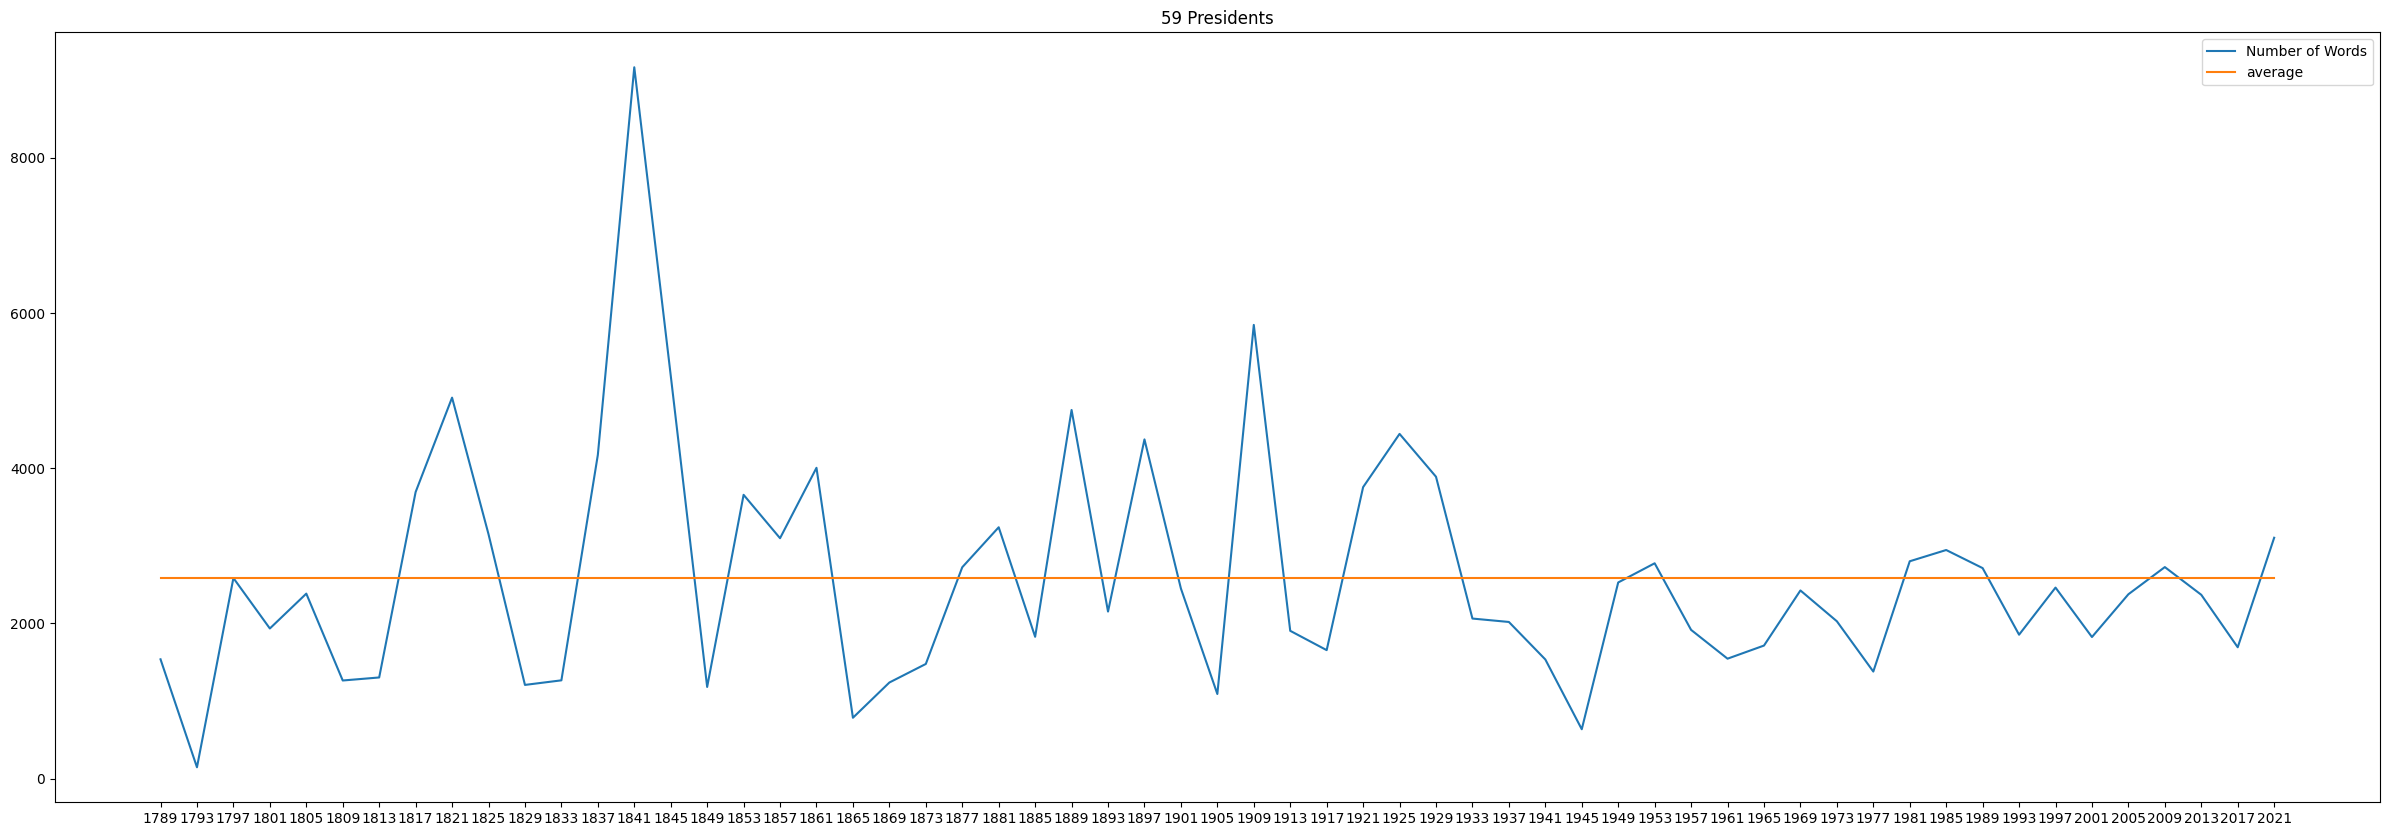

In [ ]:
#ranges
word_counts = []
dates = []
for speech in inaugurals:
  dates.append(speech[0:4])
  word_counts.append(len(inaugural.words(speech)))

# Create x and y ranges
x = dates
y = word_counts

# Calculate the mean of my y values
mean_y = sum(y)/len(y)

# Create a list, as long as x, with the mean value as each element
avg = [mean_y for _ in x]

# Plot both lines
plt.figure(figsize=(30,10))
plt.plot(x,y,label='Number of Words')
plt.plot(x,avg,label='average')
plt.title('59 Presidents')
plt.legend()
plt.show()

### Part 3: More or less dense

Ok, it's back to lexical density. I want you to extract the words for each inaugural address.

Then I want you to compute the lexical density for each speech. But NOW we're going to calculate lexical density with more accuracy. You can see a real description of [lexical density on Wikipedia](https://en.wikipedia.org/wiki/Lexical_density), but in short it uses the proportion of lexical items or content words (by which we mean: **nouns, verbs, adjectives and adverbs**) to total words in the text.

We calculate lexical density by dividing the total number of those lexical items by the total number of words of all kinds. Note: We do NOT remove stop words (as that would change the total number of words). Also note we don't make the words lower case, as that would change to POS tag that gets applied. We do however remove punctuation AFTER tagging, so we're focused on words not including punctuation symbols.

To find nouns, verbs, adjectives and adverbs, you'll need to pos tag the data, and then know the appropriate labels in the Penn Treebank tag codes. You'll find those on nexus.

For each address, I want you to print:

Date, Name, Lexical Density  

Take a look at the output. Is there a trend? Tell me about it.

Then I want you to plot the year on the x axis, and the lexical density on the y axis. Add in the line for the average lexical density. AND then add in a line showing the trend over time. I give instructions on how to do that below.

Label the graph fully.

Finally, give me a write up on the shift in lexical density (if any) over the years, and why that could be? There's something about the characteristics of lexical density on the wikipedia page that could be relevant.

In [ ]:
import urllib.request
from collections import Counter

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
inaugurals = inaugural.fileids()
print(inaugural.words('1789-Washington.txt'))
comparative_data_per_pres = []
for speech in inaugurals:
  inaug_tokens = inaugural.words(speech)
  inaug_pos = nltk.pos_tag(inaug_tokens)
  lex = [word for word, tag in inaug_pos if tag.startswith(('VB','NN','RB','JJ'))]
  word_count = len(inaug_tokens)
  density = round(len(lex) / word_count, 2)
  date = speech[0:4]
  start = speech.find("-")
  end = speech.find(".")
  speaker = speech[start+1:end]
  print('In {}, {} had a lexical density of {} in his speech'.format(date,speaker,density))
  comparative_data_per_pres.append((date,density))


['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', ...]
In 1789, Washington had a lexical density of 0.46 in his speech
In 1793, Washington had a lexical density of 0.45 in his speech
In 1797, Adams had a lexical density of 0.46 in his speech
In 1801, Jefferson had a lexical density of 0.45 in his speech
In 1805, Jefferson had a lexical density of 0.47 in his speech
In 1809, Madison had a lexical density of 0.48 in his speech
In 1813, Madison had a lexical density of 0.49 in his speech
In 1817, Monroe had a lexical density of 0.48 in his speech
In 1821, Monroe had a lexical density of 0.47 in his speech
In 1825, Adams had a lexical density of 0.48 in his speech
In 1829, Jackson had a lexical density of 0.47 in his speech
In 1833, Jackson had a lexical density of 0.46 in his speech
In 1837, VanBuren had a lexical density of 0.49 in his speech
In 1841, Harrison had a lexical density of 0.47 in his speech
In 1845, Polk had a lexical density of 0.49 in his speech
In 1849, Taylor had a lexi

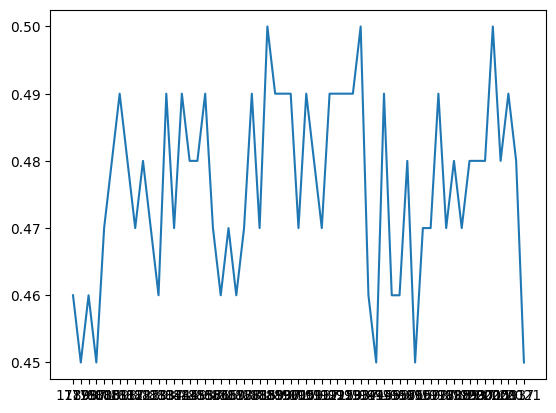

In [ ]:
# Adding a trend line.
# All straight lines are represented by the formula
# y = mx+c

# For any value x, I can compute the corresponding y value by
# multiplying x by a value m, called the slope (it dictates the angle of the line)
# and adding a constant value c, called the intercept (it dictates where the line
# crosses the y axis)

# Don't worry, we're going to find the values of m and c automatically

import numpy

x = range(1,11)
y = [13,12,14,11,14,18,20,20,26,28]

#FIRST, plot the data without a trend line, just to take
# a look

plt.plot(x,y)
plt.show()


In [ ]:
# calculate the trendline
# fit a polynomial, with degree 1 (for a linear or straight line relationship)

z = numpy.polyfit(x, y, 1)
p = numpy.poly1d(z)

# print the line equation: y = mx + b
print("y = %.3fx + (%.3f)"%(z[0],z[1]))

y = 1.782x + (7.800)


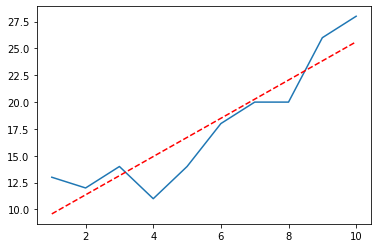

In [ ]:
# Plot the original data
# PLUS the trend line as a red dotted line

plt.plot(x,y)
plt.plot(x,p(x),"r--")
plt.show()

y = 0.000x + (0.417)


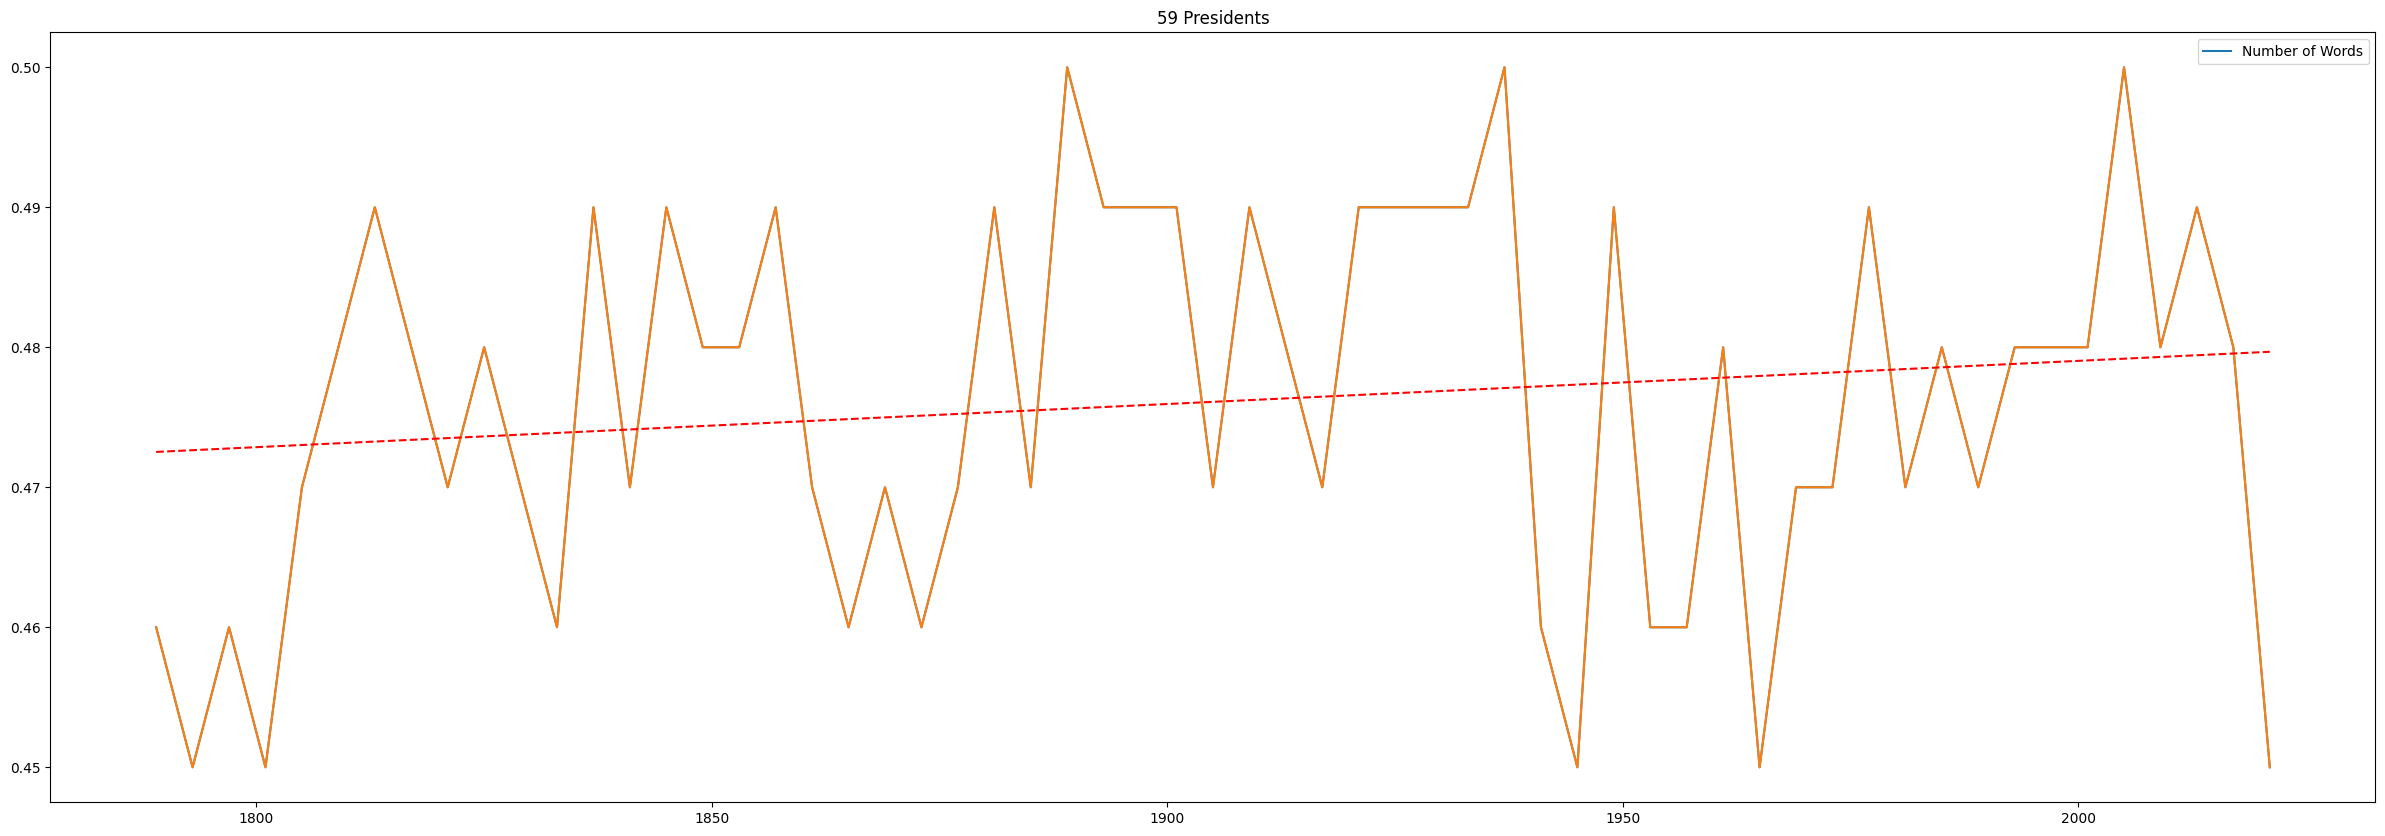

In [ ]:
# Do Part 3 here
import numpy


word_counts = []
dates = []
for day,count in comparative_data_per_pres:
  dates.append(int(day))
  word_counts.append(count)

# Create x and y ranges
x = dates
y = word_counts

z = numpy.polyfit(x, y, 1)
p = numpy.poly1d(z)

# print the line equation: y = mx + b
print("y = %.3fx + (%.3f)"%(z[0],z[1]))

plt.figure(figsize=(30,10))
plt.plot(x,y,label='Number of Words')
plt.title('59 Presidents')
plt.legend()
plt.plot(x,y)
plt.plot(x,p(x),"r--")
plt.show()

### Part 4: Bigly great

Choose TWO presidents from the corpus, and one speech from each president chosen. I want to see:
- the top 20 adjectives they use
- a word cloud of adjectives generated by frequency
- comparison between the adjectives used by the two presidents you chose

Note that this time, I'm NOT telling you exactly what operations to do. Think about it. What makes sense?

In [ ]:
from wordcloud import WordCloud

20 most common words in president Washington's speech:  [('present', 5), ('public', 5), ('immutable', 2), ('more', 2), ('necessary', 2), ('own', 2), ('former', 2), ('fellow', 2), ('providential', 2), ('private', 2), ('united', 2), ('humble', 2), ('free', 2), ('such', 2), ('great', 2), ('particular', 2), ('American', 2), ('pecuniary', 2), ('greater', 1), ('14th', 1)]
Lexical density in president Washington's speech:  0.46


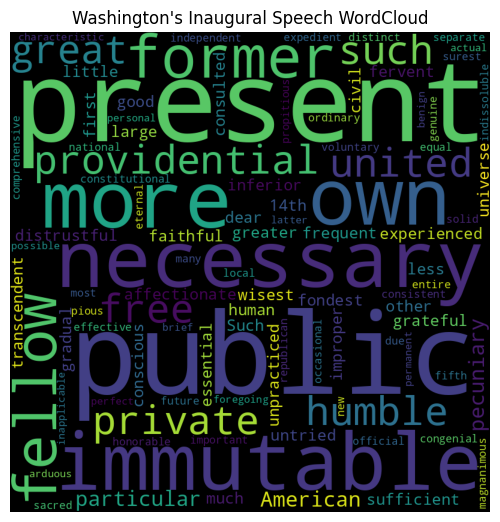

20 most common words in president Harrison's speech:  [('other', 26), ('great', 21), ('own', 16), ('such', 14), ('free', 11), ('same', 11), ('public', 11), ('true', 9), ('necessary', 8), ('former', 8), ('many', 8), ('fellow', 8), ('legislative', 8), ('political', 8), ('best', 7), ('important', 6), ('American', 6), ('more', 6), ('high', 6), ('foreign', 6)]
Lexical density in president Harrison's speech:  0.47


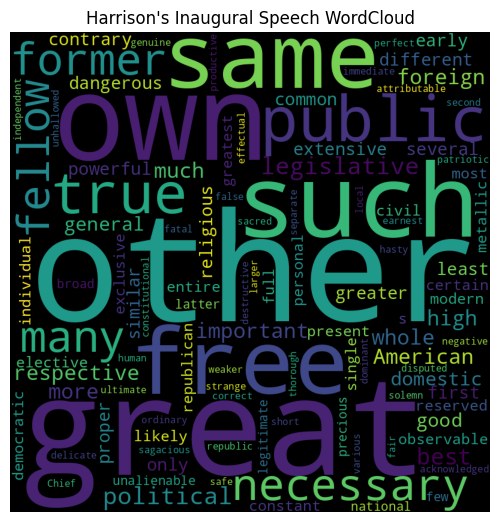

In [ ]:
# Do part 4 here

def top20_density_wordcloud(fileID):
  token = inaugural.words(fileID)
  pos = nltk.pos_tag(token)
  adj = [word for word, tag in pos if tag.startswith('JJ')]
  c1 = Counter(adj)
  top_twenty = c1.most_common(20)

  lex = [word for word, tag in pos if tag.startswith(('VB','NN','RB','JJ'))]
  word_count = len(token)
  density = round(len(lex) / word_count, 2)

  start = fileID.find("-")
  end = fileID.find(".")
  speaker = fileID[start+1:end]

  print("20 most common words in president {}'s speech: ".format(speaker), top_twenty)
  print("Lexical density in president {}'s speech: ".format(speaker), density)

  wordcloud = WordCloud(width=800,height=800, min_font_size=14).generate_from_frequencies(c1)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.title("{}'s Inaugural Speech WordCloud".format(speaker))
  plt.show()

fileID = '1789-Washington.txt'
top20_density_wordcloud(fileID)

fileID = '1841-Harrison.txt'
top20_density_wordcloud(fileID)

